<a href="https://colab.research.google.com/github/agsuvidha/ML-Models-Software-Defect-/blob/main/ML_Models_Promise(4)_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [ ]:
DATASET_PATH = "PROMISE_DATA"

datasets = [
    "kc1.csv",
    "jm1.csv",
    "pc1.csv",
    "cm1.csv"
]

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="rbf", probability=True),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

In [ ]:
all_results = []

for dataset in datasets:
    print(f"\nProcessing dataset: {dataset}")

    data = pd.read_csv(dataset)

    # Detect target column
    if "defect" in data.columns:
        target = "defect"
    elif "defects" in data.columns:
        target = "defects"
    else:
        raise ValueError(f"Target column not found in {dataset}")

    X = data.drop(columns=[target])
    y = data[target]


Processing dataset: kc1.csv

Processing dataset: jm1.csv

Processing dataset: pc1.csv

Processing dataset: cm1.csv


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

 scaler = StandardScaler()
 X_train = scaler.fit_transform(X_train)
 X_test = scaler.transform(X_test)

In [ ]:
for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        all_results.append({
            "Dataset": dataset.replace(".csv", ""),
            "Model": model_name,
            "Accuracy": round(accuracy_score(y_test, y_pred), 3),
            "Precision": round(precision_score(y_test, y_pred), 3),
            "Recall": round(recall_score(y_test, y_pred), 3),
            "F1-Score": round(f1_score(y_test, y_pred), 3),
            "AUC": round(roc_auc_score(y_test, y_prob), 3)
        })


In [ ]:
for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        all_results.append({
            "Dataset": dataset.replace(".csv", ""),
            "Model": model_name,
            "Accuracy": round(accuracy_score(y_test, y_pred), 3),
            "Precision": round(precision_score(y_test, y_pred), 3),
            "Recall": round(recall_score(y_test, y_pred), 3),
            "F1-Score": round(f1_score(y_test, y_pred), 3),
            "AUC": round(roc_auc_score(y_test, y_prob), 3)
        })


In [ ]:
results_df = pd.DataFrame(all_results)

results_df = results_df.sort_values(
    by=["Dataset", "F1-Score"],
    ascending=[True, False]
)

print("\n===== FINAL COMPARATIVE RESULTS =====\n")
print(results_df)


===== FINAL COMPARATIVE RESULTS =====

  Dataset                Model  Accuracy  Precision  Recall  F1-Score    AUC
4     cm1              XGBoost      0.86      0.300     0.3     0.300  0.607
9     cm1              XGBoost      0.86      0.300     0.3     0.300  0.607
0     cm1  Logistic Regression      0.90      0.500     0.1     0.167  0.637
5     cm1  Logistic Regression      0.90      0.500     0.1     0.167  0.637
3     cm1        Random Forest      0.88      0.250     0.1     0.143  0.622
8     cm1        Random Forest      0.88      0.250     0.1     0.143  0.622
2     cm1          Naive Bayes      0.84      0.125     0.1     0.111  0.534
7     cm1          Naive Bayes      0.84      0.125     0.1     0.111  0.534
1     cm1                  SVM      0.89      0.000     0.0     0.000  0.576
6     cm1                  SVM      0.89      0.000     0.0     0.000  0.576


In [ ]:
import os
import pandas as pd

datasets = ["cm1.csv", "kc1.csv", "jm1.csv", "pc1.csv"]

all_results = []

for dataset in datasets:
    if not os.path.exists(dataset):
        print(f"❌ File not found: {dataset}")
        continue

    print(f"✔ Processing {dataset}")

    data = pd.read_csv(dataset)

    # Detect target column
    if "defect" in data.columns:
        target = "defect"
    elif "defects" in data.columns:
        target = "defects"
    else:
        raise Exception(f"No defect column in {dataset}")

    # continue ML processing...


✔ Processing cm1.csv
✔ Processing kc1.csv
✔ Processing jm1.csv
✔ Processing pc1.csv


In [ ]:
import os
import pandas as pd

datasets = [f for f in os.listdir() if f.endswith(".csv")]

print("Datasets found:", datasets)

Datasets found: ['jm1.csv', 'kc2.csv', 'cm1.csv', 'kc1.csv', 'pc1.csv']


In [ ]:
import os
print(os.listdir())

['.config', 'jm1.csv', 'cm1.arff', 'README.md', 'kc2.arff', 'pc1.arff', 'kc1.arff', 'kc2.csv', 'jm1.arff', 'cm1.csv', 'kc1.csv', 'pc1.csv', 'sample_data']


In [ ]:
# =========================================
# FIXED MULTI-DATASET PROMISE ANALYSIS (COLAB)
# =========================================

import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# -----------------------------------------
# 1. AUTOMATICALLY DETECT ALL CSV FILES
# -----------------------------------------
datasets = [f for f in os.listdir() if f.endswith(".csv")]

print("Datasets detected:", datasets)

# -----------------------------------------
# 2. DEFINE MODELS
# -----------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="rbf", probability=True),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

# -----------------------------------------
# 3. RESULTS STORAGE
# -----------------------------------------
results = []

# -----------------------------------------
# 4. LOOP THROUGH DATASETS
# -----------------------------------------
for dataset in datasets:
    print(f"\nProcessing dataset: {dataset}")

    data = pd.read_csv(dataset)

    # Detect target column safely
    if "defect" in data.columns:
        target = "defect"
    elif "defects" in data.columns:
        target = "defects"
    else:
        print(f"⚠️ Skipping {dataset} (no defect column)")
        continue

    X = data.drop(columns=[target])
    y = data[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # -------------------------------------
    # 5. TRAIN & EVALUATE MODELS
    # -------------------------------------
    for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        results.append({
            "Dataset": dataset.replace(".csv", ""),
            "Model": model_name,
            "Accuracy": round(accuracy_score(y_test, y_pred), 3),
            "Precision": round(precision_score(y_test, y_pred), 3),
            "Recall": round(recall_score(y_test, y_pred), 3),
            "F1-Score": round(f1_score(y_test, y_pred), 3),
            "AUC": round(roc_auc_score(y_test, y_prob), 3)
        })

# -----------------------------------------
# 6. FINAL RESULTS TABLE
# -----------------------------------------
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by=["Dataset", "F1-Score"],
    ascending=[True, False]
)

print("\n===== FINAL RESULTS (ALL DATASETS) =====\n")
results_df


Datasets detected: ['jm1.csv', 'kc2.csv', 'cm1.csv', 'kc1.csv', 'pc1.csv']

Processing dataset: jm1.csv

Processing dataset: kc2.csv
⚠️ Skipping kc2.csv (no defect column)

Processing dataset: cm1.csv

Processing dataset: kc1.csv

Processing dataset: pc1.csv

===== FINAL RESULTS (ALL DATASETS) =====



,Dataset,Model,Accuracy,Precision,Recall,F1-Score,AUC
9,cm1,XGBoost,0.860,0.300,0.300,0.300,0.607
5,cm1,Logistic Regression,0.900,0.500,0.100,0.167,0.637
8,cm1,Random Forest,0.880,0.250,0.100,0.143,0.622
7,cm1,Naive Bayes,0.840,0.125,0.100,0.111,0.534
6,cm1,SVM,0.890,0.000,0.000,0.000,0.576
4,jm1,XGBoost,0.853,0.601,0.240,0.343,0.755
3,jm1,Random Forest,0.851,0.597,0.197,0.296,0.797
2,jm1,Naive Bayes,0.830,0.431,0.216,0.288,0.708
0,jm1,Logistic Regression,0.842,0.532,0.097,0.165,0.720
1,jm1,SVM,0.847,0.625,0.095,0.165,0.593


In [23]:
results_df.head()


,Dataset,Model,Accuracy,Precision,Recall,F1-Score,AUC
9,cm1,XGBoost,0.86,0.300,0.3,0.300,0.607
5,cm1,Logistic Regression,0.90,0.500,0.1,0.167,0.637
8,cm1,Random Forest,0.88,0.250,0.1,0.143,0.622
7,cm1,Naive Bayes,0.84,0.125,0.1,0.111,0.534
6,cm1,SVM,0.89,0.000,0.0,0.000,0.576


In [24]:
import pandas as pd

# Rank models within each dataset (higher F1 = better rank)
results_df["Rank"] = results_df.groupby("Dataset")["F1-Score"] \
                               .rank(ascending=False, method="average")

# Compute average rank across all datasets
avg_model_ranking = (
    results_df.groupby("Model")["Rank"]
    .mean()
    .reset_index()
    .sort_values("Rank")
)

print("===== AVERAGE MODEL RANKING (Lower Rank = Better) =====\n")
avg_model_ranking


===== AVERAGE MODEL RANKING (Lower Rank = Better) =====



,Model,Rank
4,XGBoost,1.000
2,Random Forest,2.250
1,Naive Bayes,3.250
0,Logistic Regression,4.125
3,SVM,4.375


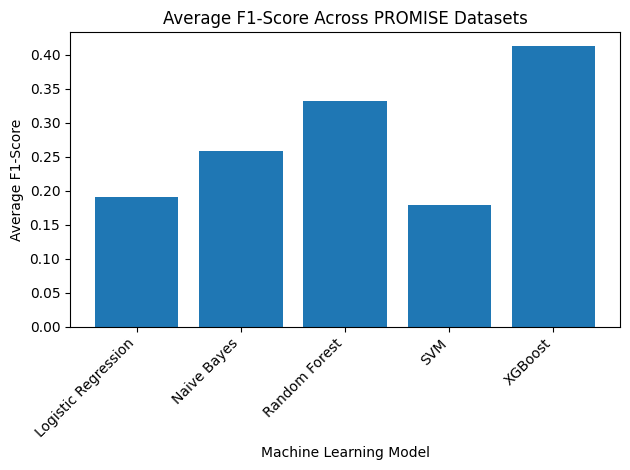

In [25]:
import matplotlib.pyplot as plt

avg_f1 = (
    results_df.groupby("Model")["F1-Score"]
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(avg_f1["Model"], avg_f1["F1-Score"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Machine Learning Model")
plt.ylabel("Average F1-Score")
plt.title("Average F1-Score Across PROMISE Datasets")
plt.tight_layout()
plt.show()


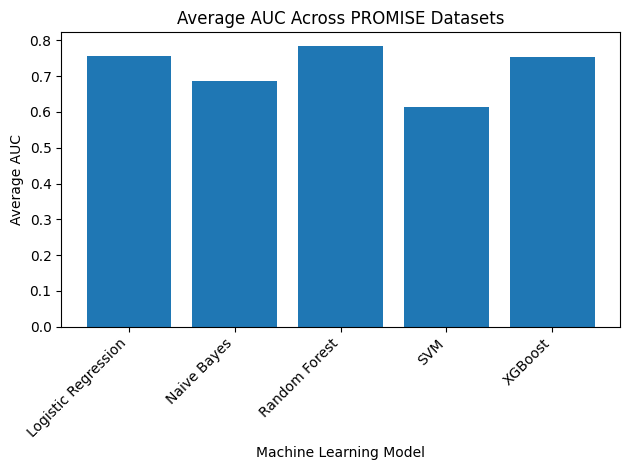

In [26]:
avg_auc = (
    results_df.groupby("Model")["AUC"]
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(avg_auc["Model"], avg_auc["AUC"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Machine Learning Model")
plt.ylabel("Average AUC")
plt.title("Average AUC Across PROMISE Datasets")
plt.tight_layout()
plt.show()


In [27]:
avg_model_ranking.to_csv("Average_Model_Ranking_PROMISE.csv", index=False)


In [28]:
results_df = pd.DataFrame(results)
results_df


,Dataset,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,jm1,Logistic Regression,0.842,0.532,0.097,0.165,0.720
1,jm1,SVM,0.847,0.625,0.095,0.165,0.593
2,jm1,Naive Bayes,0.830,0.431,0.216,0.288,0.708
3,jm1,Random Forest,0.851,0.597,0.197,0.296,0.797
4,jm1,XGBoost,0.853,0.601,0.240,0.343,0.755
5,cm1,Logistic Regression,0.900,0.500,0.100,0.167,0.637
6,cm1,SVM,0.890,0.000,0.000,0.000,0.576
7,cm1,Naive Bayes,0.840,0.125,0.100,0.111,0.534
8,cm1,Random Forest,0.880,0.250,0.100,0.143,0.622
9,cm1,XGBoost,0.860,0.300,0.300,0.300,0.607


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. COMBINED COMPARISON TABLE
# ==============================

combined_comparison = (
    results_df
    .groupby("Model")
    .agg(
        Avg_Accuracy=("Accuracy", "mean"),
        Avg_Precision=("Precision", "mean"),
        Avg_Recall=("Recall", "mean"),
        Avg_F1_Score=("F1-Score", "mean"),
        Avg_AUC=("AUC", "mean")
    )
    .reset_index()
    .sort_values("Avg_F1_Score", ascending=False)
)

print("===== COMBINED MODEL COMPARISON (AVERAGED ACROSS DATASETS) =====\n")
combined_comparison


===== COMBINED MODEL COMPARISON (AVERAGED ACROSS DATASETS) =====



,Model,Avg_Accuracy,Avg_Precision,Avg_Recall,Avg_F1_Score,Avg_AUC
4,XGBoost,0.88150,0.52825,0.35050,0.41225,0.75200
2,Random Forest,0.88250,0.50700,0.25375,0.33225,0.78300
1,Naive Bayes,0.84500,0.30000,0.23800,0.25775,0.68600
0,Logistic Regression,0.88250,0.50025,0.11975,0.19125,0.75650
3,SVM,0.88475,0.49800,0.11075,0.17900,0.61375


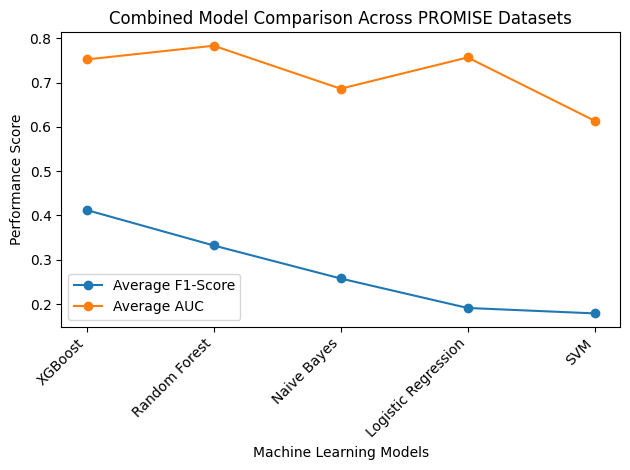

In [30]:
plt.figure()
plt.plot(
    combined_comparison["Model"],
    combined_comparison["Avg_F1_Score"],
    marker="o",
    label="Average F1-Score"
)

plt.plot(
    combined_comparison["Model"],
    combined_comparison["Avg_AUC"],
    marker="o",
    label="Average AUC"
)

plt.xlabel("Machine Learning Models")
plt.ylabel("Performance Score")
plt.title("Combined Model Comparison Across PROMISE Datasets")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
combined_comparison.to_csv(
    "Combined_Model_Comparison_PROMISE.csv",
    index=False
)
